In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

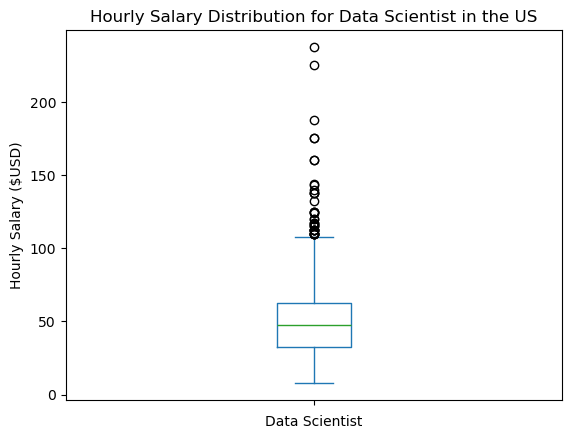

In [9]:
sha_ds = df[df['job_title_short'] == 'Data Scientist'].copy()
sha_ds['salary_hour_avg'].plot(
    kind='box',
    label=''
)

plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.show()

C:\Users\edutrade\AppData\Local\Temp\ipykernel_19552\3978827887.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_data, labels=countries)


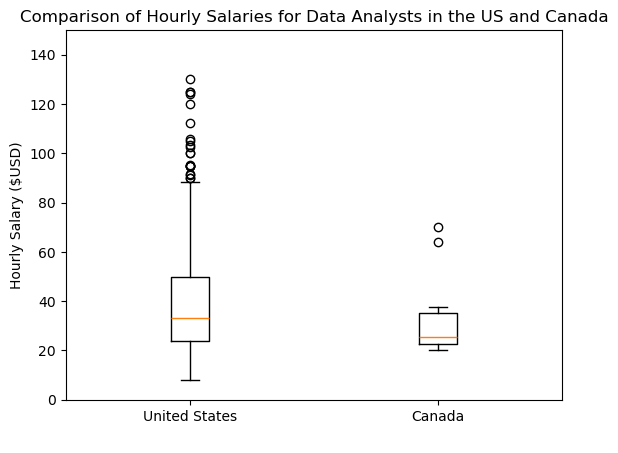

In [8]:
countries = ['United States', 'Canada']

sha_da = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset='salary_hour_avg')

country_data = [sha_da[sha_da['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(country_data, labels=countries)

plt.ylabel('Hourly Salary ($USD)')
plt.xlabel('    ')
plt.ylim(0, 150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()

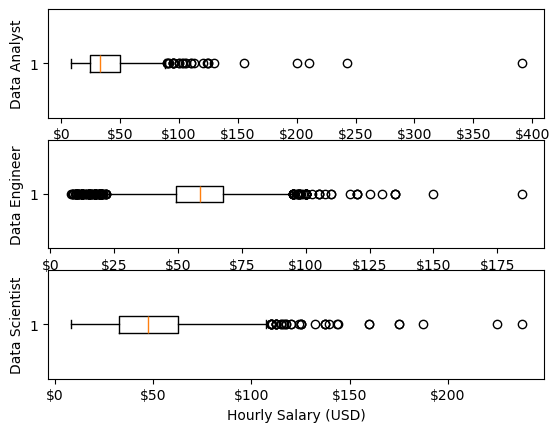

In [ ]:
#test
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_job = df[df['job_title_short'].isin(job_titles)].dropna(subset='salary_hour_avg')

fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    ax[i].boxplot(df_job[df_job['job_title_short'] == job_title]['salary_hour_avg'], vert=False),
    ax[i].set_xlabel('Hourly Salary (USD)'),
    ax[i].set_ylabel(job_title),
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x)}'))

plt.show()
fig.tight_layout(rect=(0,0,2,1))

C:\Users\edutrade\AppData\Local\Temp\ipykernel_19552\1750546158.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(job_list, labels=job_titles)


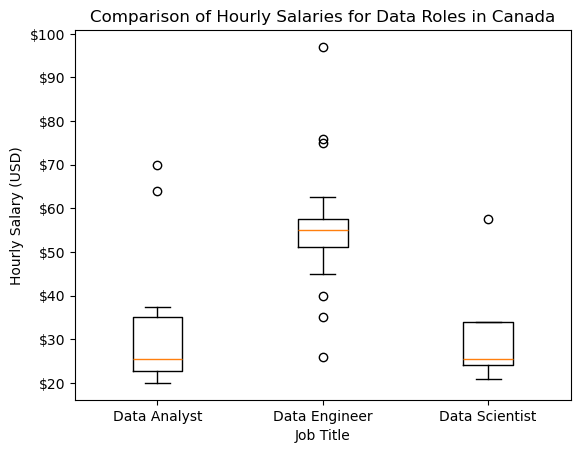

In [24]:
# Filter out data
df_Canada = df[df['job_country'] == 'Canada'].dropna(subset=['salary_hour_avg'])
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_list = [df_Canada[df_Canada['job_title_short'] == job]['salary_hour_avg'] for job in job_titles]

# Plot charts
fig, ax = plt.subplots()
ax.boxplot(job_list, labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()